In [38]:
## In this section we will do some preparation for later analysis and will show and visualize some descriptive statistics of the data

In [27]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [28]:
## loading the csv file which was created after scraping the IMDb website
imdb_top_movies = pd.read_csv("imdb_top_movies.csv")
imdb_top_movies = imdb_top_movies.astype({"year": int})

## have some insight in the data
imdb_top_movies.head()

,Unnamed: 0,rank,IMDB_id,movie_name,year,director,starring,rating,number_of_reviews,genres,country,language,budget,box_office_revenue,runtime
0,0,1,111161,The Shawshank Redemption,1994,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",9.3,2395380,['Drama'],['USA'],['English'],"$25,000,000","$28,817,291",142
1,0,2,68646,The Godfather,1972,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan']",9.2,1659275,"['Crime', 'Drama']",['USA'],"['English', 'Italian', 'Latin']","$6,000,000","$246,120,986",175
2,0,3,71562,The Godfather: Part II,1974,Francis Ford Coppola,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",9.0,1153451,"['Crime', 'Drama']",['USA'],"['English', 'Italian', 'Spanish', 'Latin', 'Si...","$13,000,000","$48,035,783",202
3,0,4,468569,The Dark Knight,2008,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,2357059,"['Action', 'Crime', 'Drama', 'Thriller']","['USA', 'UK']","['English', 'Mandarin']","$185,000,000","$1,005,973,645",152
4,0,5,50083,12 Angry Men,1957,Sidney Lumet,"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']",9.0,706423,"['Crime', 'Drama']",['USA'],['English'],"$350,000",$955,96


In [29]:
## get info about data types for further analysis
imdb_top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          250 non-null    int64  
 1   rank                250 non-null    int64  
 2   IMDB_id             250 non-null    int64  
 3   movie_name          250 non-null    object 
 4   year                250 non-null    int64  
 5   director            250 non-null    object 
 6   starring            250 non-null    object 
 7   rating              250 non-null    float64
 8   number_of_reviews   250 non-null    int64  
 9   genres              250 non-null    object 
 10  country             250 non-null    object 
 11  language            250 non-null    object 
 12  budget              222 non-null    object 
 13  box_office_revenue  238 non-null    object 
 14  runtime             250 non-null    int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 29.4+ KB

In [30]:
## note that this step only works when run for the first time when we run the previous code immediately prior to it

# quick clean
imdb_top_movies = imdb_top_movies.dropna( axis=0, how='all')

## removing all non-usd values in budget, as well as rows with empty budget values
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("EUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("BRL", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("JPY", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("FRF", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("INR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("DEM", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("GBP", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("KRW", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("AUD", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("RUR", na=False)]
imdb_top_movies = imdb_top_movies[~imdb_top_movies.budget.str.contains("TRL", na=False)]
imdb_top_movies = imdb_top_movies[imdb_top_movies.budget.str.contains("", na=False)]


## removing the commas and the Dollar sign, transforming the budget number to an int
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace(",","", regex=True)
imdb_top_movies["budget"] = imdb_top_movies["budget"].str.replace("$","", regex=True).astype(int)


## cleaning the revenue data by removing Dollar signs, commas and dropping rows with NaN values. Also transforing the values into floats
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace(',', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].str.replace('$', '', regex=True)
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].dropna()
imdb_top_movies["box_office_revenue"]=imdb_top_movies["box_office_revenue"].astype(float)

## Removing brackets for genres, country and language
imdb_top_movies["genres"] = imdb_top_movies["genres"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["country"] = imdb_top_movies["country"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["language"] = imdb_top_movies["language"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "").str.replace(',', "")
imdb_top_movies["starring"] = imdb_top_movies["starring"].str.replace("[", "").str.replace("'","").str.replace("]", "").str.replace('"', "")

imdb_top_movies.to_csv("imdb_top_movies_clean.csv")

In [21]:
## we create a csv file for later regressions (see "Analysis" file)
regression_stats = imdb_top_movies[["movie_name","rating" ,"number_of_reviews", "budget", "box_office_revenue", "runtime"]]
regression_stats
regression_stats.to_csv("regression_stats.csv", sep=',')

In [18]:
## Show summary statistics for all numeric data
imdb_top_movies[["rating" ,"number_of_reviews", "budget", "box_office_revenue", "runtime"]].describe()

,rating,number_of_reviews,budget,box_office_revenue,runtime
count,198.000000,1.980000e+02,1.980000e+02,1.920000e+02,198.000000
mean,8.315152,6.441609e+05,3.622193e+07,2.342298e+08,129.707071
std,0.237313,4.804411e+05,5.586261e+07,3.664023e+08,29.452104
min,8.100000,4.756100e+04,1.330000e+05,9.550000e+02,67.000000
25%,8.100000,2.420730e+05,3.000000e+06,1.591320e+07,110.250000
50%,8.300000,5.623110e+05,1.500000e+07,7.530501e+07,126.500000
75%,8.400000,9.225918e+05,4.000000e+07,3.218548e+08,143.500000
max,9.300000,2.395380e+06,3.560000e+08,2.797501e+09,238.000000


the average running time is  130  minutes


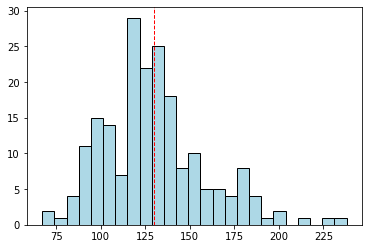

In [10]:
## have a look at different running times numerically but also visually

## make a histogram of the running time using matplot
plt.hist(imdb_top_movies["runtime"], color = 'lightblue', edgecolor = 'black',
         bins = int(25))
## add red line with the average runtime
plt.axvline(imdb_top_movies["runtime"].mean(), color='red', linestyle='dashed', linewidth=1)

## print average running time
print("the average running time is ", round(imdb_top_movies["runtime"].mean()), " minutes")

In [116]:
## in a second step we would like to also define quantiles
## define different quantilies 
q0 = imdb_top_movies["runtime"].quantile(0)
q25=imdb_top_movies["runtime"].quantile(0.25)
q50=imdb_top_movies["runtime"].quantile(0.5)
q75=imdb_top_movies["runtime"].quantile(0.75)
q100=imdb_top_movies["runtime"].quantile(1)

## filter each film based on its runtime and store it in a new value
first_quantile = imdb_top_movies[imdb_top_movies["runtime"] <= q25]
first_quantile_count = first_quantile["runtime"].count()

second_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q25) & (imdb_top_movies["runtime"] <= q50)]
second_quantile_count = second_quantile["runtime"].count()

third_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q50) & (imdb_top_movies["runtime"] <= q75)]
third_quantile_count = third_quantile["runtime"].count()

fourth_quantile = imdb_top_movies[imdb_top_movies["runtime"] > q75]
fourth_quantile_count = fourth_quantile["runtime"].count()

## calculate average running time of each quantile below and round results full numbers

q25_mean = round(sum(first_quantile["runtime"])/first_quantile_count)
q50_mean = round(sum(second_quantile["runtime"])/second_quantile_count)
q75_mean = round(sum(third_quantile["runtime"])/third_quantile_count)
q100_mean = round(sum(fourth_quantile["runtime"])/fourth_quantile_count)

## printing the quantiles and the average of each quantile below
print("There are",first_quantile_count,"movies with an average runtime of", q25_mean,"minutes in the first quantile (0-25%)")
print("There are",second_quantile_count,"movies with an average runtime of", q50_mean, "minutes in the second quantile (25-50%)")
print("There are",third_quantile_count,"movies with an average runtime of", q75_mean, "minutes in the third quantile (50-75%)")
print("There are",fourth_quantile_count,"movies with an average runtime of", q100_mean, "minutes in the fourth quantile (75-100%)")



There are 50 movies with an average runtime of 96 minutes in the first quantile (0-25%)
There are 49 movies with an average runtime of 119 minutes in the second quantile (25-50%)
There are 49 movies with an average runtime of 133 minutes in the third quantile (50-75%)
There are 50 movies with an average runtime of 170 minutes in the fourth quantile (75-100%)


Drama        145
Adventure     50
Thriller      48
Crime         41
Action        33
Comedy        32
Mystery       31
War           27
Sci-Fi        25
Fantasy       22
Romance       22
Family        21
Biography     21
Animation     17
History       12
Sport          8
Western        8
Music          7
Horror         4
Film-Noir      2
Musical        2
dtype: int64


<AxesSubplot:ylabel='Genres'>

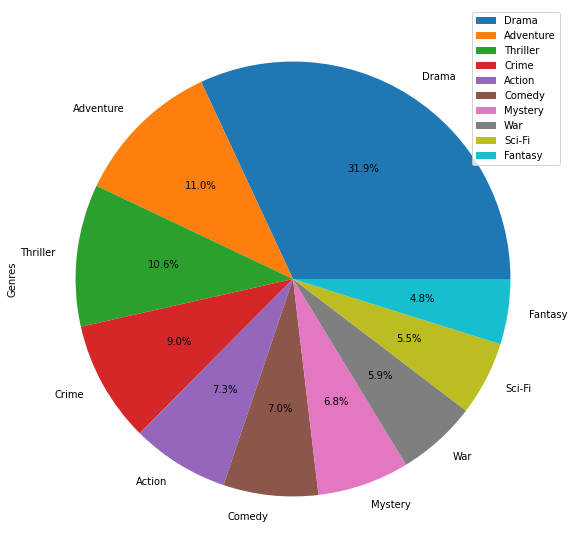

In [61]:
## Create a pie chart for the top 10 rated genres
genres_counts = imdb_top_movies["genres"].str.split(expand=True).stack().value_counts()
print(genres_counts)
new_dataframe = pd.DataFrame({"Genres": genres_counts},
                            )

## Creata dataframe for only the top 10
df1 = new_dataframe[:10].copy()

#Create pie chart for distribution of top 10 genres
df1.plot.pie(y = "Genres", figsize = (10,10), autopct='%1.1f%%')


USA               167
UK                 40
France             13
Germany            13
Italy              10
Japan               7
Spain               7
Canada              6
Mexico              4
Australia           4
South               4
Zealand             3
Korea               3
Sweden              3
West                3
New                 3
China               2
Argentina           2
Iran                2
India               2
Ireland             2
Lebanon             1
Czechoslovakia      1
Austria             1
Kong                1
Hong                1
Cyprus              1
Malta               1
Poland              1
Morocco             1
Switzerland         1
Algeria             1
Africa              1
Qatar               1
Denmark             1
dtype: int64


<AxesSubplot:ylabel='Country'>

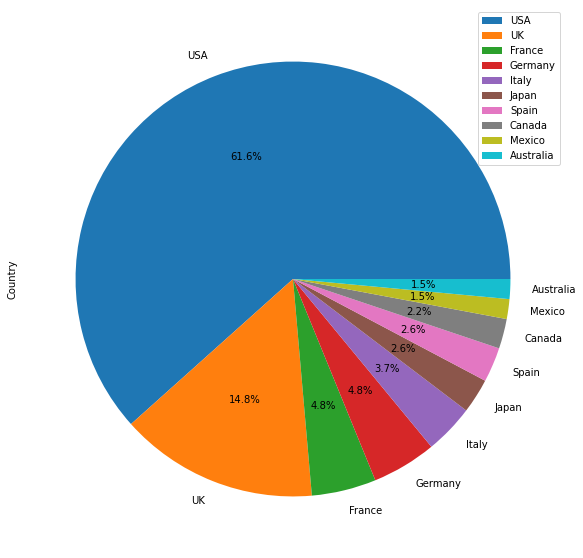

In [62]:
## Create a pie chart for the top 10 rated countries
country_counts = imdb_top_movies["country"].str.split(expand=True).stack().value_counts()
print(country_counts)
new_dataframe6 = pd.DataFrame({"Country": country_counts},
                            )
## Creata dataframe for only the top 10
df2 = new_dataframe6[:10].copy()

#Create pie chart for distribution of top 10 countries
df2.plot.pie(y = "Country", figsize = (10,10), autopct='%1.1f%%')

In [114]:
## Create a tool to check how many movies are available in a specific language
language_counts = imdb_top_movies["language"].str.split(expand=True).stack().value_counts()
print(language_counts)

## Ask for the language
language_check = input("Enter the language you would like to check: ")

## create an if function which will show how many movies are available in a language 
## or prints error message if there are no movies available in that language


try:
    print(language, "was used as a language in",language_counts.loc[language_check],
          "movies, which equals", language_counts.loc[language_check]/250*100,"% of all movies")

except KeyError:
    print("Sorry, you have either misspelled the language or,", language_check, " was not used as a language in any of the top 250 movies")


English        182
French          33
German          28
Spanish         26
Italian         20
Japanese        16
Latin           11
Arabic           8
Russian          8
Cantonese        4
Korean           4
Vietnamese       4
Hebrew           4
None             4
Sindarin         3
Hungarian        2
Old              2
Swedish          2
Polish           2
Danish           2
Hindi            2
Yiddish          2
Xhosa            2
Persian          2
Mandarin         2
Quenya           1
Nepali           1
Esperanto        1
Sicilian         1
Gaelic           1
Irish            1
Norwegian        1
Thai             1
Swahili          1
Saami            1
Turkish          1
Language         1
Zulu             1
Amharic          1
Greek            1
Czech            1
Scottish         1
American         1
Portuguese       1
Kinyarwanda      1
Sign             1
Hmong            1
dtype: int64
Enter the language you would like to check: fadsfa
Sorry, you have either misspelled the langu